### Divisive hierarchical clustering is less commonly used compared to agglomerative clustering, and it’s not directly supported by many popular libraries. However, you can implement it manually. Here’s a simple example using Python:

#### Steps for Divisive Clustering
- Start with all data points in a single cluster.
- At each step, split the largest cluster into two smaller clusters.
- Continue splitting until the desired number of clusters is reached

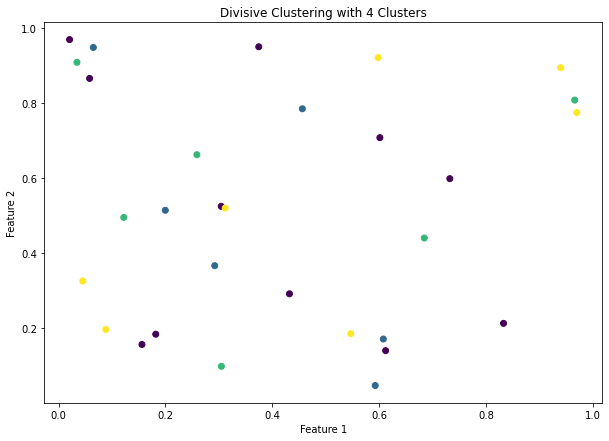

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3]


In [2]:
## For simplicity, we'll use a basic approach where we split clusters using k-means clustering at each step.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

def divisive_clustering(X, n_clusters):
    # Start with all points in one cluster
    clusters = [X]
    
    # Continue splitting until we have the desired number of clusters
    while len(clusters) < n_clusters:
        # Find the cluster with the largest number of points
        largest_cluster = max(clusters, key=len)
        clusters.remove(largest_cluster)
        
        # Perform k-means clustering on the largest cluster
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(largest_cluster)
        
        # Split the largest cluster into two clusters
        cluster_1 = largest_cluster[labels == 0]
        cluster_2 = largest_cluster[labels == 1]
        
        # Add the new clusters back to the list
        clusters.append(cluster_1)
        clusters.append(cluster_2)
    
    # Combine all points into a single array with cluster labels
    all_points = np.vstack(clusters)
    labels = np.concatenate([np.full(len(cluster), i) for i, cluster in enumerate(clusters)])
    
    return all_points, labels

# Example dataset
np.random.seed(42)
X = np.random.rand(30, 2)  # 30 points in 2D space

# Perform divisive clustering
n_clusters = 4  # Number of desired clusters
X_clustered, labels = divisive_clustering(X, n_clusters)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f"Divisive Clustering with {n_clusters} Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Cluster labels:", labels)


### Explanation
- divisive_clustering function: This function performs divisive clustering by repeatedly splitting the largest cluster into two smaller clusters until the desired number of clusters is reached.
- KMeans: Used to split the largest cluster into two clusters at each step.
- Combining results: All clusters are combined into one array, and labels are assigned to each data point.

##### This approach is a basic implementation of divisive clustering and may not be the most efficient for large datasets. For more complex needs, you might need a more sophisticated algorithm or library